In [1]:
import numpy as np

import pandas as pd
import seaborn as sb

from keras.models import Sequential # Class
from keras.layers import Dense # Class

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# 훈련용, 검증용
df = pd.read_csv('./sonar.csv', header=None)
# print(df.info())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
data = df.values
print(type(data))
print(len(data))  # 208건
X = data[:, 0:60].astype(float)  # 0 ~ 59
print(X[0:5, 0:4])
Y_obj = data[:, 60]  # 1차원 배열
print(Y_obj[0:5])

<class 'numpy.ndarray'>
208
[[0.02   0.0371 0.0428 0.0207]
 [0.0453 0.0523 0.0843 0.0689]
 [0.0262 0.0582 0.1099 0.1083]
 [0.01   0.0171 0.0623 0.0205]
 [0.0762 0.0666 0.0481 0.0394]]
['R' 'R' 'R' 'R' 'R']


In [4]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder() # 문자열을 숫자로 그룹화해서 변경, 문자코드 순서 적용
e.fit(Y_obj)   # R, M 
Y = e.transform(Y_obj)  # 0, 1, 2 정수로 변환 (알파벳 순으로 숫자부여)
print(Y)
print(len(Y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
208


In [5]:
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원

seed = 0
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,random_state=seed)
print(y_val)
print(y_val.shape)

[1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 1]
(42,)


In [6]:
from keras.callbacks import EarlyStopping
from keras import regularizers

# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear
model.add(Dense(60, input_shape=(60,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=120, batch_size=5, callbacks=[early_stopping])

Train on 166 samples, validate on 42 samples
Epoch 1/120
166/166 [==============================] - 0s 1ms/step - loss: 0.6835 - acc: 0.5783 - val_loss: 0.6505 - val_acc: 0.7619
Epoch 2/120
166/166 [==============================] - 0s 271us/step - loss: 0.6379 - acc: 0.6988 - val_loss: 0.6355 - val_acc: 0.6190
Epoch 3/120
166/166 [==============================] - 0s 265us/step - loss: 0.6209 - acc: 0.7048 - val_loss: 0.6218 - val_acc: 0.6190
Epoch 4/120
166/166 [==============================] - 0s 259us/step - loss: 0.6027 - acc: 0.7410 - val_loss: 0.6178 - val_acc: 0.5952
Epoch 5/120
166/166 [==============================] - 0s 259us/step - loss: 0.5752 - acc: 0.7229 - val_loss: 0.5886 - val_acc: 0.7143
Epoch 6/120
166/166 [==============================] - 0s 277us/step - loss: 0.5597 - acc: 0.8012 - val_loss: 0.5805 - val_acc: 0.6667
Epoch 7/120
166/166 [==============================] - 0s 271us/step - loss: 0.5504 - acc: 0.7289 - val_loss: 0.5578 - val_acc: 0.7857
Epoch 8/120


Epoch 61/120
166/166 [==============================] - 0s 289us/step - loss: 0.2538 - acc: 0.9096 - val_loss: 0.3553 - val_acc: 0.8810
Epoch 62/120
166/166 [==============================] - 0s 289us/step - loss: 0.2701 - acc: 0.8976 - val_loss: 0.3618 - val_acc: 0.8571
Epoch 63/120
166/166 [==============================] - 0s 313us/step - loss: 0.2544 - acc: 0.8855 - val_loss: 0.3549 - val_acc: 0.8571
Epoch 64/120
166/166 [==============================] - 0s 283us/step - loss: 0.2551 - acc: 0.9157 - val_loss: 0.3505 - val_acc: 0.8810
Epoch 65/120
166/166 [==============================] - 0s 229us/step - loss: 0.2420 - acc: 0.9036 - val_loss: 0.3391 - val_acc: 0.8571
Epoch 66/120
166/166 [==============================] - 0s 235us/step - loss: 0.2382 - acc: 0.9157 - val_loss: 0.3397 - val_acc: 0.9048
Epoch 67/120
166/166 [==============================] - 0s 295us/step - loss: 0.2380 - acc: 0.9217 - val_loss: 0.3544 - val_acc: 0.8810
Epoch 68/120
166/166 [==========================

In [7]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


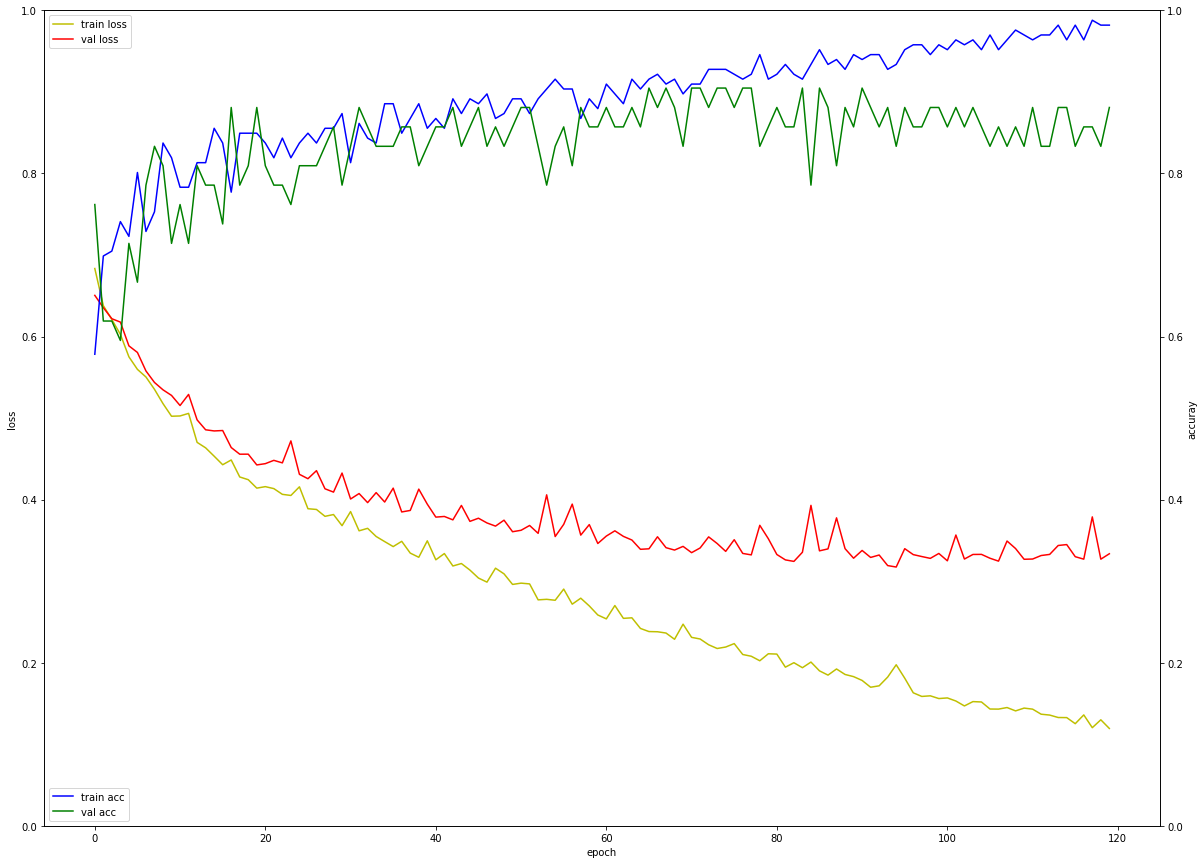

In [8]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_val,y_val, batch_size=2)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

42/42 [==============================] - 0s 0us/step
손실값 :  0.3336295924105105  / 정확도 :  88.09523809523809 %


In [13]:
model.save('./Sonar1.h5')

In [14]:
from keras.models import load_model # model 사용

model = load_model('./Sonar1.h5')

In [15]:
# 여러 건의 데이터
x_data = np.array([
     [0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117],
     [0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094],
     [0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062],
     [0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,0.0947,0.2497,0.2209,0.3195,0.3340,0.3323,0.2780,0.2975,0.2948,0.1729,0.3264,0.3834,0.3523,0.5410,0.5228,0.4475,0.5340,0.5323,0.3907,0.3456,0.4091,0.4639,0.5580,0.5727,0.6355,0.7563,0.6903,0.6176,0.5379,0.5622,0.6508,0.4797,0.3736,0.2804,0.1982,0.2438,0.1789,0.1706,0.0762,0.0238,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439],
     [0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,0.2907,0.2259,0.3136,0.3302,0.3660,0.3956,0.4386,0.4670,0.5255,0.3735,0.2243,0.1973,0.4337,0.6532,0.5070,0.2796,0.4163,0.5950,0.5242,0.4178,0.3714,0.2375,0.0863,0.1437,0.2896,0.4577,0.3725,0.3372,0.3803,0.4181,0.3603,0.2711,0.1653,0.1951,0.2811,0.2246,0.1921,0.1500,0.0665,0.0193,0.0156,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231],
    
])

# 1건의 데이터
# data = "0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117"
# data = np.array(data.split(','), dtype=float)  # or int
# x_data = np.array([
#     data,
# ])

In [19]:
yp = model.predict(x_data)
print(yp)
# R R R M M : 1 1 1 0 0

for i in range(len(x_data)) : # 0~4
    if yp[i][0] >= 0.5 :
        res = 'R'
    else :
        res = 'M'
    print('광물 종류', yp[i], res)
        

[[0.9461433 ]
 [0.85448915]
 [0.9305897 ]
 [0.38339457]
 [0.00186983]]
광물 종류 [0.9461433] R
광물 종류 [0.85448915] R
광물 종류 [0.9305897] R
광물 종류 [0.38339457] M
광물 종류 [0.00186983] M


In [24]:
# 복잡한 모델(과대/과소 적합 발생 모델)
model = Sequential()

# 과대적합 모델
#model.add(Dense(60, input_shape=(60,), activation='relu'))
#model.add(Dense(200, activation='relu'))
#model.add(Dense(50, activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
# 학습이 부족한 모델(과소)
model.add(Dense(20, input_shape=(60,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=120, batch_size=5, callbacks=[early_stopping])

Train on 166 samples, validate on 42 samples
Epoch 1/120
166/166 [==============================] - 0s 2ms/step - loss: 0.6563 - acc: 0.6446 - val_loss: 0.6613 - val_acc: 0.6429
Epoch 2/120
166/166 [==============================] - 0s 277us/step - loss: 0.6304 - acc: 0.6687 - val_loss: 0.6393 - val_acc: 0.6429
Epoch 3/120
166/166 [==============================] - 0s 307us/step - loss: 0.6114 - acc: 0.7048 - val_loss: 0.6293 - val_acc: 0.6429
Epoch 4/120
166/166 [==============================] - 0s 301us/step - loss: 0.5974 - acc: 0.7470 - val_loss: 0.6171 - val_acc: 0.6905
Epoch 5/120
166/166 [==============================] - 0s 277us/step - loss: 0.5838 - acc: 0.7590 - val_loss: 0.6110 - val_acc: 0.6429
Epoch 6/120
166/166 [==============================] - 0s 265us/step - loss: 0.5767 - acc: 0.7229 - val_loss: 0.5971 - val_acc: 0.7381
Epoch 7/120
166/166 [==============================] - 0s 265us/step - loss: 0.5601 - acc: 0.7711 - val_loss: 0.5907 - val_acc: 0.6905
Epoch 8/120


Epoch 61/120
166/166 [==============================] - 0s 313us/step - loss: 0.3349 - acc: 0.8735 - val_loss: 0.4307 - val_acc: 0.8333
Epoch 62/120
166/166 [==============================] - 0s 265us/step - loss: 0.3301 - acc: 0.8855 - val_loss: 0.4275 - val_acc: 0.8333
Epoch 63/120
166/166 [==============================] - 0s 253us/step - loss: 0.3271 - acc: 0.8614 - val_loss: 0.4258 - val_acc: 0.8095
Epoch 64/120
166/166 [==============================] - 0s 325us/step - loss: 0.3316 - acc: 0.8795 - val_loss: 0.4244 - val_acc: 0.7857
Epoch 65/120
166/166 [==============================] - 0s 319us/step - loss: 0.3230 - acc: 0.8675 - val_loss: 0.4243 - val_acc: 0.8333
Epoch 66/120
166/166 [==============================] - 0s 325us/step - loss: 0.3212 - acc: 0.8735 - val_loss: 0.4260 - val_acc: 0.8095
Epoch 67/120
166/166 [==============================] - 0s 313us/step - loss: 0.3168 - acc: 0.8735 - val_loss: 0.4255 - val_acc: 0.8095
Epoch 68/120
166/166 [==========================

In [25]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                1220      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


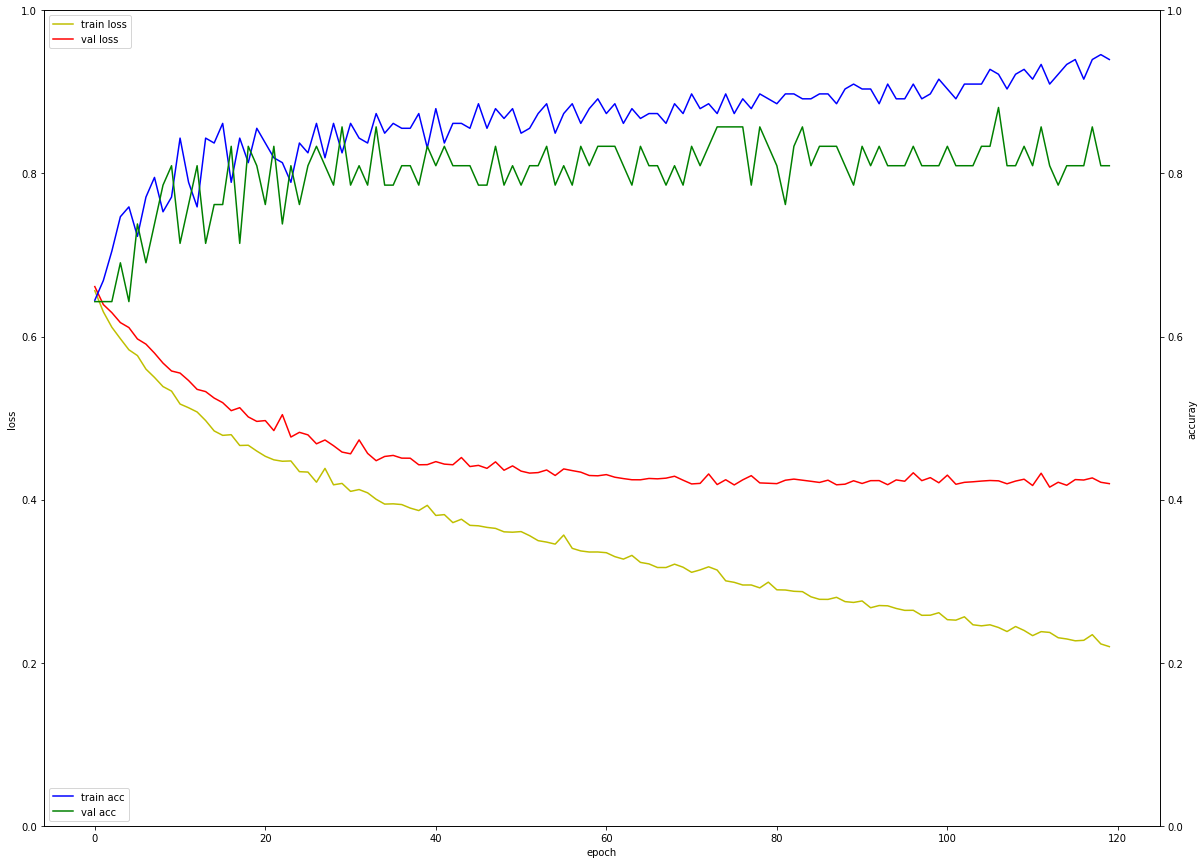

In [26]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(x_val,y_val, batch_size=2)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')
model.save('./Sonar1_Other.h5')
model = load_model('./Sonar1_Other.h5')

yp = model.predict(x_data)
print(yp)
# R R R M M : 1 1 1 0 0

for i in range(len(x_data)) : # 0~4
    if yp[i][0] >= 0.5 :
        res = 'R'
    else :
        res = 'M'
    print('광물 종류', yp[i], res)

42/42 [==============================] - 0s 3ms/step
손실값 :  0.419607542366499  / 정확도 :  80.95238095238095 %
[[0.6020484 ]
 [0.85101163]
 [0.9509768 ]
 [0.5941682 ]
 [0.03299366]]
광물 종류 [0.6020484] R
광물 종류 [0.85101163] R
광물 종류 [0.9509768] R
광물 종류 [0.5941682] R
광물 종류 [0.03299366] M
